# <center> Machine Learning for customer segmentation through clustering</center>

# Seminar goals:
In this project, we will develop and apply different clustering tecnhiques. Unsupervised methodologies are broadly used in business to generate **insights** from several type of data sources as text or image and they are a baseline tool for multiple areas marketing, sales or customer care. 

In our case, we will use clustering techniques to understand a customer base; i.e. describe the main characteristics of our customers for **marketing purposes**.

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering and finally, training and prediction.
The project is structured as follows:

![picture](https://drive.google.com/uc?id=1unkR2DsgHSKgYD1iUHBs0rMeEdLZP4-C)


In this project, we will apply two clustering techniques: K-means and Mixture of Gaussians. Both techniques follow different approach to cluster or segment the data. We will learn how to apply them using Python and how they are used to generate insights about our customer base, i.e. identify the main types or **sterotypes** of customers and their differences. Besides, we will learn to calculate the optimal K value and measure the quality of the clustering.

*******

# Step 0. Understanding the problem: customers' stereotypes 

Recently, we have joined a data scientist and AI engineering team of a telco company. This team is supporting decision making process of several internal areas as marketing and customer care.

Our marketing colleagues are planning to launch a new commercial campaign for a new mobile tariff. As input for the tariff design, the Marketing product managers needs to know the **pattern** or **stereotypes** of our current customers: i.e. the main customers' sectors (Industry, Services, Agriculture, ...), number of employees, Turnover, which products they consume, how much they spend in telco services, etc. 

To support marketing demands, we are going **to use two of the most important clustering techniques: K-means and Mixture of Gaussians (MoG).**


# Step 1: Data gathering

![picture](https://drive.google.com/uc?id=1Bzc8-h_wPI6_Q5-WwuuGOIlxDoYRtj9U)


In this practice we are using a new dataset named `customer_dt.csv`. This file contains information of **272 of our telco's consumers** for 3 months. In particular, the detailed information for each customer is:

- *Company_id*: It's an integer that identifies any company. Each value is unique for every company.
- *Reference_date_month*: It refers to the month corresponding to the customer information
- *Product*: Name level 1 of the product
- *Sub_product*: Name level 2 of the product
- *Type_ID_Coverage_GSM*: type of coverage for GSM (2G) network: indoor, outdoor or no-coverage
- *Type_ID_Coverage_UMTS*: type of coverage for UMTS (3G) network: indoor, outdoor or no-coverage
- *Type_ID_Coverage_LTE*: type of coverage for LTE (4G) network: indoor, outdoor or no-coverage
- *CNT_EMPLOYEE: Number of employees of the company
- *Sector*: It's an integer that identifies the sector of the company's activity
- *Sub_sector*: It's an integer that identifies the sub_sector of the company's activity
- *Turnover*: The annual incomes of the company
- *ZIP*: Postal code where the company is placed
- *Data_usage*: Number of Gigabits for this product and sub_product and Reference_date_month 
- *Voice_usage*: Number of minutes for this product and sub_product and Reference_date_month 
- *Monthly_expense*: Euros expended in this product and sub_product and Reference_date_month
- *N_lines*: Number of mobile lines this product and sub_product and Reference_date_month

# Step 2: Data understanding and preparation

Once we know the problem to solve, the next stage is to have a clear understanding of the data we have extracted and to prepare it before modelling. In particular, we will:
- List and verify the type of each variable (object, float, int...). Identify variables with nulls. Measure the memory usage
- Eliminate rows with nulls in order to have a dataset 100% fulfilled
- Aggregate rows with monthly expense per customers in order to have just 1 sample per customers
- Exploratory Data Analysis to understand main statistics (mean, standard deviation, min&max values and 25%-50%-75% quartiles) and distribution of the most relevant variables or features as data usage, voice usage, monthly expense and number of lines
- Plot several graphs in order to identify how variables are related between them. In particular:
- correlation matrix
- 2D and 3D scatter plots between data usage, voice usage and monthly expense

Once this part, also known as **data wrangling** of the Project is done, we should achieve a deep knowledge about the data. Besides, the dataset will have been processed to be ready to apply the clustering algorithms to solve the business problem.

## Libraries

Let's import the main Python libraries required in our project.

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA

Open the csv with separator ";" and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

## Data

In [9]:
df = pd.read_csv('data/7.1_CustomerData.csv', sep = ';')

In [10]:
df.head()

,Company_id,Reference_date_month,Product,Sub_product,TYPE_ID_Coverage_GSM,TYPE_ID_Coverage_UMTS,TYPE_ID_Coverage_LTE,CNT_EMPLOYEE,Sector,Sub_sector,Turnover,Revenue_Scale,ZIP,Data_usage,Voice_usage,Monthly_expense,N_lines
0,27,2019-09-01 00:00:00,FB,FB S 2.0,indoor,indoor,indoor,1000.0,76,762,117560584.0,50.000.001 - 500.000.000,55218,0.197695,592.916666,40.895523,2
1,27,2019-10-01 00:00:00,FB,FB S 2.0,indoor,indoor,indoor,1000.0,76,762,117560584.0,50.000.001 - 500.000.000,55218,0.202878,414.500000,40.504723,2
2,27,2019-11-01 00:00:00,FB,FB S 2.0,indoor,indoor,indoor,1000.0,76,762,117560584.0,50.000.001 - 500.000.000,55218,0.025758,579.850000,40.880215,2
3,79,2019-09-01 00:00:00,FB,FB M 2.0,indoor,no_coverage,no_coverage,58.0,7,63,11000000.0,5.000.001 - 25.000.000,74706,1.789936,2633.950000,174.356365,7
4,79,2019-09-01 00:00:00,FB,FB S 2.0,indoor,no_coverage,no_coverage,58.0,7,63,11000000.0,5.000.001 - 25.000.000,74706,2.480318,3559.633332,365.362522,19


## Data preparation

### Null treatment


[**EX1**] [**REPORT**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which is the variable with more nulls? And with no nulls? 

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

In our dataset there a subset of variables that describe a company regardless of the month, i.e. `Company_id`, `CNT_EMPLOYEE`, `Sector`, `Sub_sector`, `Turnover`, `Revenue_Scale` and `ZIP`. We should guarantee that our dataset for training the cluster has no **nulls** in those variables.  

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_id             1175 non-null   int64  
 1   Reference_date_month   1175 non-null   object 
 2   Product                1175 non-null   object 
 3   Sub_product            1175 non-null   object 
 4   TYPE_ID_Coverage_GSM   1128 non-null   object 
 5   TYPE_ID_Coverage_UMTS  1128 non-null   object 
 6   TYPE_ID_Coverage_LTE   1128 non-null   object 
 7   CNT_EMPLOYEE           1124 non-null   float64
 8   Sector                 1175 non-null   int64  
 9   Sub_sector             1175 non-null   int64  
 10  Turnover               772 non-null    float64
 11  Revenue_Scale          772 non-null    object 
 12  ZIP                    1175 non-null   int64  
 13  Data_usage             1175 non-null   float64
 14  Voice_usage            1175 non-null   float64
 15  Mont

[**EX2**] [**CODE**] Eliminate those rows with nulls in any of the descriptive company variables, i.e. `Company_id`, `CNT_EMPLOYEE`, `Sector`, `Sub_sector`, `Turnover`, `Revenue_Scale` and `ZIP`.

Tip: you may have to use the [reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) function. Why?

In [25]:
df1 = df.dropna(subset = ['Company_id', 'CNT_EMPLOYEE', 'Sector', 'Sub_sector', 'Turnover', 'Revenue_Scale', 'ZIP'])

Let's re-calculate the variables with NULL values

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 0 to 1174
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_id             771 non-null    int64  
 1   Reference_date_month   771 non-null    object 
 2   Product                771 non-null    object 
 3   Sub_product            771 non-null    object 
 4   TYPE_ID_Coverage_GSM   768 non-null    object 
 5   TYPE_ID_Coverage_UMTS  768 non-null    object 
 6   TYPE_ID_Coverage_LTE   768 non-null    object 
 7   CNT_EMPLOYEE           771 non-null    float64
 8   Sector                 771 non-null    int64  
 9   Sub_sector             771 non-null    int64  
 10  Turnover               771 non-null    float64
 11  Revenue_Scale          771 non-null    object 
 12  ZIP                    771 non-null    int64  
 13  Data_usage             771 non-null    float64
 14  Voice_usage            771 non-null    float64
 15  Month

As we observe, there are still few rows with **null** values in `TYPE_ID_Coverage_GSM`, `TYPE_ID_Coverage_UMTS` and `TYPE_ID_Coverage_LTE`. Let's understand which registers are.

[**EX3**] [**CODE**] Create a `non_coverage_register` variable with the rows with **nulls** in these coverage variables. How many registers does the new `non_coverage_register` variable have?

In [27]:
non_coverage_register = df1[df1.isnull().any(axis=1)]
non_coverage_register.head()

,Company_id,Reference_date_month,Product,Sub_product,TYPE_ID_Coverage_GSM,TYPE_ID_Coverage_UMTS,TYPE_ID_Coverage_LTE,CNT_EMPLOYEE,Sector,Sub_sector,Turnover,Revenue_Scale,ZIP,Data_usage,Voice_usage,Monthly_expense,N_lines
253,10211,2019-09-01 00:00:00,FB,FB M 2.0,NaN,NaN,NaN,750.0,42,469,5.300000e+09,über 500.000.000,65824,69.755495,737.416668,5820.981436,170
254,10211,2019-10-01 00:00:00,FB,FB M 2.0,NaN,NaN,NaN,750.0,42,469,5.300000e+09,über 500.000.000,65824,35.404019,1291.600000,5878.126447,170
255,10211,2019-11-01 00:00:00,FB,FB M 2.0,NaN,NaN,NaN,750.0,42,469,5.300000e+09,über 500.000.000,65824,57.639125,1540.799999,5936.617083,170


As **nulls** in coverage only affects one customer, we can decide to remove it from the training dataset or to impute an statistic value as the mean, median or most frequent value in each of these nulls.

[**EX4**] [**CODE**] Remove the customers with **nulls** in coverage variables.

In [28]:
df2 = df1.dropna(subset = ['TYPE_ID_Coverage_GSM', 'TYPE_ID_Coverage_UMTS', 'TYPE_ID_Coverage_LTE'])

Now, the resulting dataset should look like this:

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 1174
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_id             768 non-null    int64  
 1   Reference_date_month   768 non-null    object 
 2   Product                768 non-null    object 
 3   Sub_product            768 non-null    object 
 4   TYPE_ID_Coverage_GSM   768 non-null    object 
 5   TYPE_ID_Coverage_UMTS  768 non-null    object 
 6   TYPE_ID_Coverage_LTE   768 non-null    object 
 7   CNT_EMPLOYEE           768 non-null    float64
 8   Sector                 768 non-null    int64  
 9   Sub_sector             768 non-null    int64  
 10  Turnover               768 non-null    float64
 11  Revenue_Scale          768 non-null    object 
 12  ZIP                    768 non-null    int64  
 13  Data_usage             768 non-null    float64
 14  Voice_usage            768 non-null    float64
 15  Month

As explained before, our original dataset includes **up to 3 months of telco consumption (voice, data and number of mobile lines) and expense** per customer.

### Aggregation

[**EX5**] [**CODE**] Create a new dataset named `customer_dt_summary` with only one register per `Company_id` and `Sub_product` category with the average value in `Data_usage`, `Voice_usage` and `Monthly_expense` and `N_lines`. Which is the size of your new dataset? Verify this new dataset does not contain **nulls**.

In [37]:
columns = ['Data_usage', 'Voice_usage', 'Monthly_expense', 'N_lines']
customer_dt_summary = df2.groupby(['Company_id', 'Sub_product']).mean()[columns]

In [38]:
customer_dt_summary.head()

Data_usage  Voice_usage  Monthly_expense  N_lines
Company_id Sub_product                                                   
27         FB S 2.0       0.142110   529.088889        40.760154      2.0
79         FB M 2.0       2.559694  2843.300000       186.736801      7.0
           FB S 2.0       3.301382  3320.655555       365.423259     19.0
95         FB L 2.0       9.922201     0.000000        28.000100      1.0
           FB M 2.0       9.958323  2762.566667       258.310459      8.0

### Data distribution

In Machine Learning, it is key to understand the nature of the data before training. For numeric variables, it is useful to calculate the distribution and main statistics.

[**EX6**] [**REPORT**] Calculate the main statistics (max, min, mean, median and standard deviation) of `Data_usage`, `Voice_usage`, `Monthly_expense` and `N_lines` variables. Plot a histogram for each of these variables

Tip: use [Seaborn library](https://seaborn.pydata.org/) with `kde=False` to create a histogram. You also can use **dataframe_column.hist(bins=number_of_bins)**

        Data_usage    Voice_usage  Monthly_expense     N_lines
count   271.000000     271.000000       271.000000  271.000000
mean     40.945260    3412.355185       271.695149   17.732472
std     196.456296   17114.636943       778.991046   72.476151
min       0.000000       0.000000         0.002533    0.000000
25%       0.382085      46.363889        34.266244    1.000000
50%       3.019796     369.477778        65.289406    2.000000
75%      14.700590    1319.836111       191.187136    7.000000
max    2568.383400  260638.688889      9091.513176  973.000000


array([[<AxesSubplot:title={'center':'Data_usage'}>,
        <AxesSubplot:title={'center':'Voice_usage'}>],
       [<AxesSubplot:title={'center':'Monthly_expense'}>,
        <AxesSubplot:title={'center':'N_lines'}>]], dtype=object)

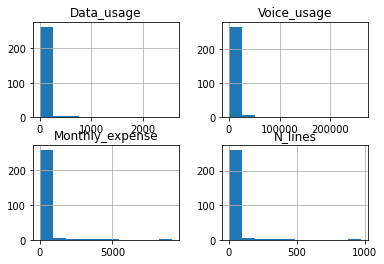

In [52]:
print(customer_dt_summary[columns].describe())
customer_dt_summary[columns].hist(bins=10)

### Correlation analysis

Additionaly to understanding each individual variable, it is important to understand how they are related to each other. 

[**EX7**] [**REPORT**] Calculate and plot the correlation matrix between traffic attributes (i.e. `Voice_usage` and `Data_usage`), `Monthly_expense`, `N_lines`, `Turnover` and `CNT_EMPLOYEE`. 
- Which are the variables with more and less correlation with respect to the `Monthly_expense` variable?
- Which are the top 2 variables with higher correlation with `Voice_usage`?
- Is `Data_usage` correlated with `Turnover`? Does it mean that a company spend more in `Data usage` when its `Turnover`increases? 
- Which is the highest correlated variable with `CNT_EMPLOYEE`?
- A company with high `Voice traffic` consumption but low `Data traffic`uses to spend more that other company with high `Data traffic`and low `Voice traffic`? Justify your answer.
- Can we delete any column? Justify your answer

Tip: use [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to compute a correlation matrix, and [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to show this graphically.

<AxesSubplot:>

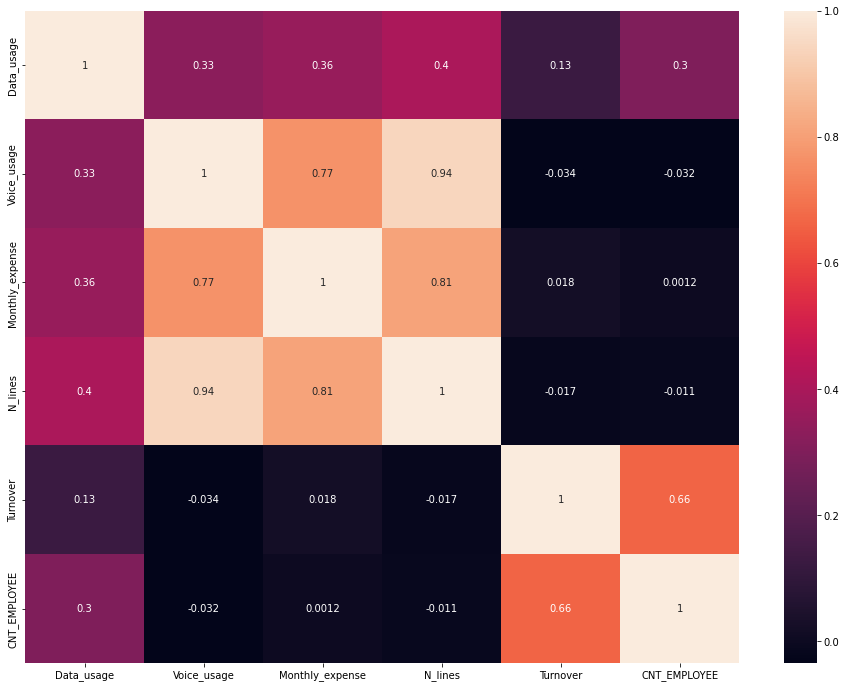

In [56]:
plt.figure(figsize = (16, 12))
sns.heatmap(df2[['Data_usage', 'Voice_usage', 'Monthly_expense', 'N_lines', 'Turnover', 'CNT_EMPLOYEE']].corr(), annot = True)

Another option to analyze the relation 1-to-1 between 2 variables in through scatter plots and try to view if we can create clusters with aggregated data. Let's simplify the original dataset and create a new `training_dt`dataset with only `Voice_usage`, `Data_usage` and `Monthly_expense`.

In [163]:
training_dt = customer_dt_summary[['Data_usage', 'Voice_usage', 'Monthly_expense']]

[**EX8**] [**REPORT**] Visualize a scatter plot with `Voice_usage` vs `Monthly_expense` variables. Could you visually identify any cluster? How many? Repeat the plot with registers which `Voice_usage`is between 0 and 10000 minutes. Could you identify any cluster?

<AxesSubplot:xlabel='Voice_usage', ylabel='Monthly_expense'>

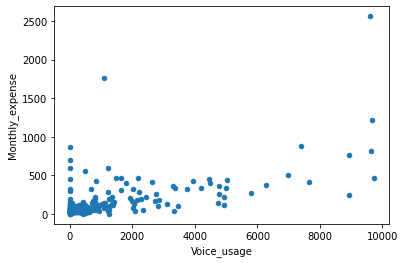

In [192]:
training_dt.where(training_dt['Voice_usage'] < 10000).plot.scatter(x = 'Voice_usage', y = 'Monthly_expense')

[**EX9**] [**REPORT**] Visualize a scatter plot with `Data_usage` vs `Monthly_expense` variables. Could you visually identify any cluster? How many?Repeat the plot with registers which `Data_usage`is between 0 and 500 GB. Could you identify any cluster?

<AxesSubplot:xlabel='Data_usage', ylabel='Monthly_expense'>

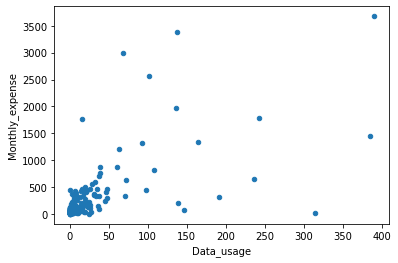

In [193]:
training_dt.where(training_dt['Data_usage'] < 500).plot.scatter(x = 'Data_usage', y = 'Monthly_expense')

[**EX10**] [**REPORT**] To improve our understanding of the data, plot a 3D visualization between `Voice_usage`, `Data_usage`and `Monthly_expense` for a new subset of the dataset where `Voice_usage`is below 10000 minutes and `Data_usage`is <=100 GB.
- Could you visually identify any cluster? How many?
- Could you identify any **outlier**?
- Could you identify a cluster bigger than the others? Describe approximately it in terms of the values of these 3 variables


Tip: use [scatter3d](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) to create 3D scatter plots.

If we rotate the 3D scatter plot, the output looks like as follows:

In [166]:
training_dt_reduced = training_dt.where(training_dt['Data_usage'] <= 100).where(training_dt['Voice_usage'] < 10000)

/tmp/ipykernel_4422/3088744250.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure(figsize = (12, 8)).gca(projection='3d')


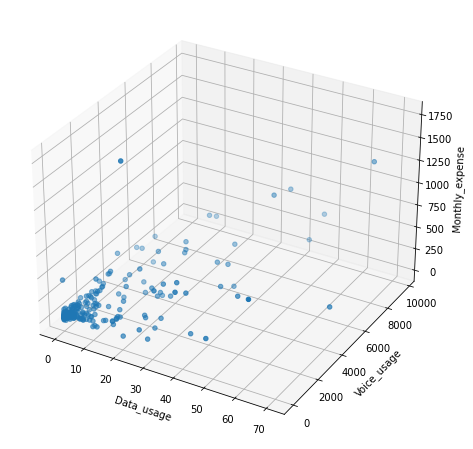

In [194]:
threedee = plt.figure(figsize = (12, 8)).gca(projection='3d')
threedee.scatter(training_dt_reduced['Data_usage'], training_dt_reduced['Voice_usage'], training_dt_reduced['Monthly_expense'])
threedee.set_xlabel('Data_usage')
threedee.set_ylabel('Voice_usage')
threedee.set_zlabel('Monthly_expense')
plt.show()

# Step 3: Training the model and performance evaluation: Segmentation of customers through K-means clustering

Once the dataset has been processed and we have a first understanding of the type and characteristics of the variables, we are ready to apply clustering methods to group the register to answer the key marketing question: How are our customers?

We will use the Sklearn’s Kmeans function to cluster the dataset.
Once the clustering is done, we need to understand the output. 2-dimension and 3-dimension scatter plot visualizations are excellent techniques to evaluate the clustering output.
Finally, as part of any Machine Learning Project, we need to calculate the perfomance of our model. For Kmeans, we will 1) estimate the optimal K value through the Elbow method and 2) calculate the sihouette score for several values of K


## Training model

[**EX11**] [**CODE**] [**REPORT**] Execute the Sklearn library's KMeans function and compare both `Data_usage`vs `Voice_usage`scatter plots. Are they similar?

Tip: We recommend the following  [KMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) parameters: `init`='random', `n_init`=10, `tol`=1e-04 and `random_state`=0

In [168]:
kmeans = KMeans(init = 'random', n_init = 10, tol = 1.e-4, random_state=0).fit(training_dt)

Now, it's time to understand how the clustering process works! To do it, we are plotting the `training_dt` painting the colour based on `Cluster_id`, output from the k-means. 

[**EX12**][**REPORT**] Plot the following scatter plots representing the centroids:
 - Between `Data_usage` vs `Voice_usage` 
 - Between `Monthly_expense`vs `Voice_usage` and
 - Between `Monthly_expense`vs `Data_usage`
 
 Describe the minority cluster in terms of `Data_usage`, `Voice_usage`and `Monthly_expense`. How many register is if formed by?

In [169]:
#predict the labels of clusters.
label = kmeans.predict(training_dt)

training_dt_kmeans = training_dt.copy()
training_dt_kmeans['label'] = label

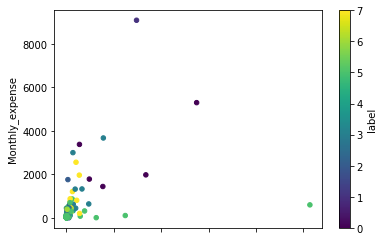

In [170]:
#plotting the results
training_dt_kmeans.plot.scatter(x = 'Data_usage', y = 'Monthly_expense', c = 'label', colormap = 'viridis')
plt.show()

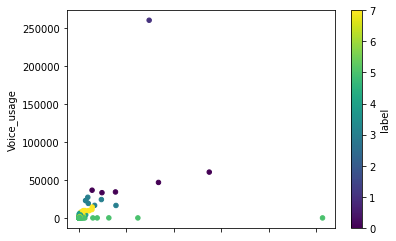

In [171]:
#plotting the results
training_dt_kmeans.plot.scatter(x = 'Data_usage', y = 'Voice_usage', c = 'label', colormap = 'viridis')
plt.show()

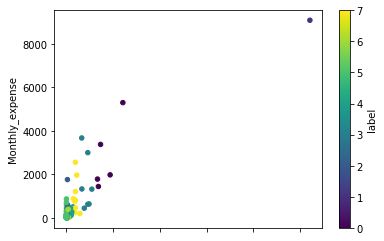

In [172]:
#plotting the results
training_dt_kmeans.plot.scatter(x = 'Voice_usage', y = 'Monthly_expense', c = 'label', colormap = 'viridis')
plt.show()

[**EX13**] [**REPORT**] Repeat the 3D plot visualization between `Voice_usage`, `Data_usage`and `Monthly_expense` after the clustering process. Apply a rotation of (0, -60)

Tip: use [scatter3d](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) to create 3D scatter plots.

/tmp/ipykernel_4422/2304630004.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure(figsize = (12, 8)).gca(projection='3d')


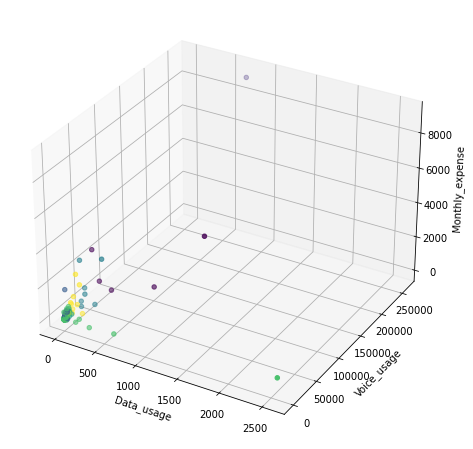

In [205]:
threedee = plt.figure(figsize = (12, 8)).gca(projection='3d')
threedee.scatter(training_dt_kmeans['Data_usage'], training_dt_kmeans['Voice_usage'], training_dt_kmeans['Monthly_expense'], c = training_dt_kmeans['label'], cmap = 'viridis')
threedee.set_xlabel('Data_usage')
threedee.set_ylabel('Voice_usage')
threedee.set_zlabel('Monthly_expense')
plt.show()

## Measuring the quality of the clustering and the optimal K: Elbow method and sihouette

The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a higher dimensional dataset that cannot be visualized.  
[For more information click here](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20value%20of%20the%20silhouette,near%200%20denote%20overlapping%20clusters.)

### Elbow method

[**EX14**] [**REPORT**] Repeat the clustering (using Sklearn's) with **K=5** and plot `Data_usage`vs `Voice_usage`scatter visualization. Can the new 5 clusters be visually distinguished? From a visual perspective, is this new cluster better than with **K=3**?

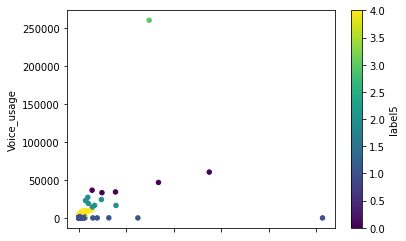

In [174]:
kmeans5 = KMeans(n_clusters = 5, init = 'random', n_init = 5, tol = 1.e-4, random_state=0).fit(training_dt)

#predict the labels of clusters.
label5 = kmeans5.predict(training_dt)

training_dt_kmeans5 = training_dt.copy()
training_dt_kmeans5['label5'] = label5

#plotting the results
training_dt_kmeans5.plot.scatter(x = 'Data_usage', y = 'Voice_usage', c = 'label5', colormap = 'viridis')
plt.show()

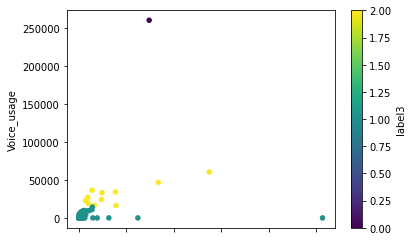

In [175]:
kmeans3 = KMeans(n_clusters = 3, init = 'random', n_init = 3, tol = 1.e-4, random_state=0).fit(training_dt)

#predict the labels of clusters.
label3 = kmeans3.predict(training_dt)

training_dt_kmeans3 = training_dt.copy()
training_dt_kmeans3['label3'] = label3

#plotting the results
training_dt_kmeans3.plot.scatter(x = 'Data_usage', y = 'Voice_usage', c = 'label3', colormap = 'viridis')
plt.show()

The Elbow method is a useful graphical tool to estimate the optimal number of clusters. Intuitively, we can say that, if k increases, the distorsion within each cluster will decrease because the samples will be closer to their centroids. However, sometimes is not efficient to increase the **K** value because the distorsion doesn't decrease enough in comparision with the computation load required for higher **K**. 

Let's calculate the Elbow method for the previous dataset, i.e. containing only `Data_usage` and `Voice_usage` variables.
We use [km.inertia_](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) from the Sklearn library's KMeans to measure the sum of squared distances of samples to their closest cluster center.

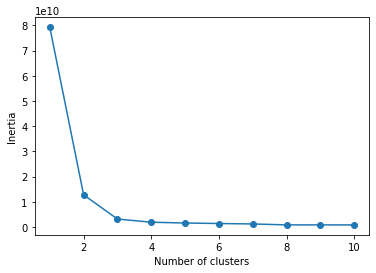

In [176]:
# Selection of the dataset
training_dt=customer_dt_summary[['Voice_usage', 'Data_usage', 'Monthly_expense']]
inertia = []
#Calculate the Kmeans from K=1 to 10
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=10,
        tol=1e-04, random_state=0
    )
    km.fit(training_dt)
    inertia.append(km.inertia_)

# plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow point shows the best number of clusters: **3**

[**EX15**] [**REPORT**] Repeat the Elbow method for a training dataset formed by `Voice_usage`and `Data_usage`only. Which is the optimal **K** value?

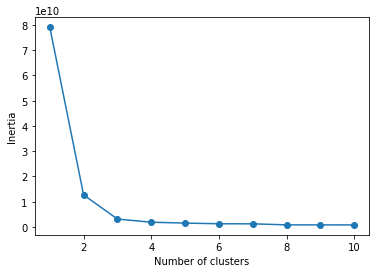

In [195]:
# Selection of the dataset
training_dt=customer_dt_summary[['Voice_usage', 'Data_usage']]
inertia = []
#Calculate the Kmeans from K=1 to 10
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=10,
        tol=1e-04, random_state=0
    )
    km.fit(training_dt)
    inertia.append(km.inertia_)

# plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Silhouette method

**Silhouette** is a metric to measure the *quality* of the clustering process. Clustering models with a high **Silhouette** are said to be dense (i.e. samples in the same cluster are similar to each other) and well separated (where samples in different clusters are not very similar to each other, poorly matched to neighboring clusters). This measure has a range of [-1, 1].


[**EX16**] [**CODE**][**REPORT**]Calculate the `silhouette_score`value for a range of KMeans clusters from 2 to 7. The dataset to use is `training_dt`with the following variables: `Voice_usage`, `Data_usage` and `Monthly_expense`. Which is the value of **K** with better **Silhouette**?

Tip: use [silhouette_score](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) to calculate the silhouette score and further information.

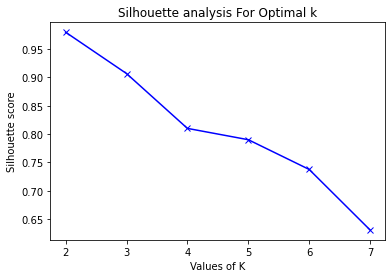

In [178]:
silhouette_avg = []
range_n_clusters = [2,3,4,5,6,7]

for num_clusters in range_n_clusters:
    labels = KMeans(init='random', n_clusters=num_clusters, n_init=10, tol=1e-04, random_state=0).fit_predict(training_dt.values)
    silhouette_avg.append(silhouette_score(training_dt, labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

For a visual understanding about each cluster, we can plot the silhouette score for each sample of the dataset. Execute the following code:

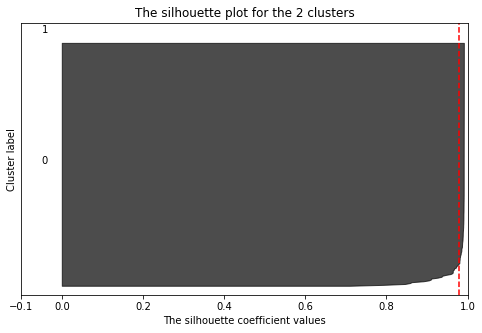

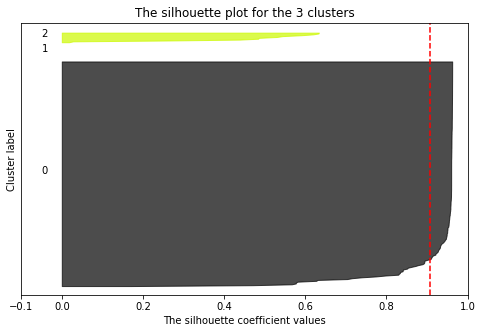

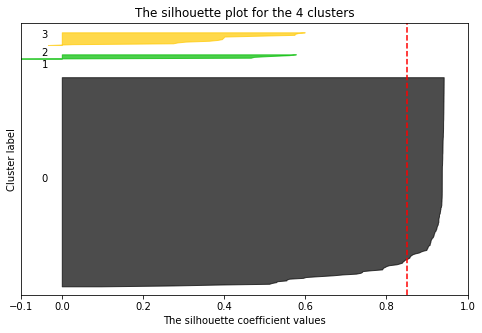

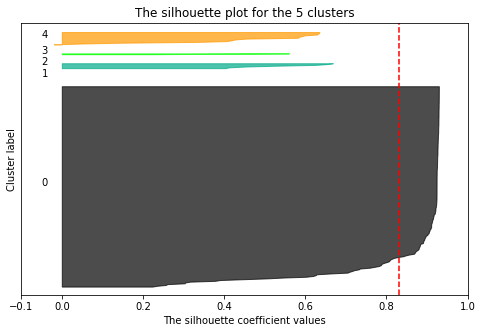

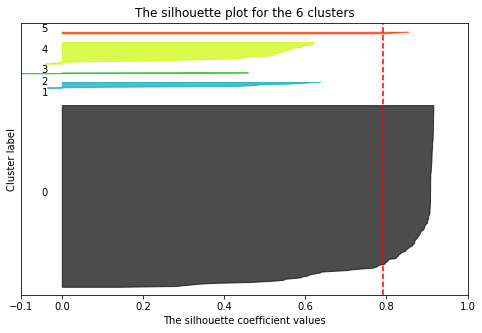

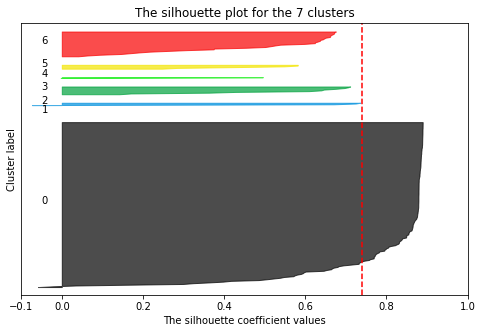

In [179]:
# Selection of the dataset
training_dt = customer_dt_summary[['Voice_usage', 'Data_usage', 'Monthly_expense']]
for j in range(2, 8):
    n_clusters=j
    km  = KMeans(j, random_state=10)
    cluster_labels = km.fit_predict(training_dt)
    silhouette_avg = silhouette_score(training_dt, cluster_labels)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(training_dt, cluster_labels)
    # Create a subplot with 1 row and 1 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(training_dt) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(j):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the {} clusters".format(i+1))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In this case, Silhouette is not a good method to identify the best K value.  
The best K is evaluated from three points:
*  alls clusters above average silhouette score
*  plots are more or less of similar thickness
*  plots are of similar sizes.

# Step 4: Insights generation: Understanding the clustering output

### Final view resulting clusters 

To confirm that the separation of the various records into clusters is ideal, we can use a **dimension reduction technique** like **PCA** that allows us to visualize in 2 dimensions these data classified by the cluster to which they belong.  
This particular exercise has only 3 dimensions and would not be necessary

[**EX20**][**CODE**][**REPORT**] Show customer_dt_summary and the labels associated for every point in a PCA plot

In [180]:
training_dt = customer_dt_summary[['Voice_usage', 'Data_usage', 'Monthly_expense']]

First of all we normalize the data to achieve better results

In [181]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(training_dt)

Apply PCA

In [183]:
pca = PCA(n_components = 2, random_state = 42)
principal_components = pca.fit_transform(scaled_features)

print('The 2 first compononents explain {}% of data variance'.format(100*pca.explained_variance_ratio_.sum()))

The 2 first compononents explain 95.87803611720153% of data variance


Plot the PCA points with associated label

In [198]:
pca_df = pd.DataFrame(principal_components,columns=['PC1','PC2'])
pca_df['Cluster'] = label3
pca_df.head()

,PC1,PC2,Cluster
0,-0.389184,-0.045222,1
1,-0.179258,-0.133586,1
2,-0.012879,-0.197580,1
3,-0.396343,0.015175,1
4,-0.106100,-0.120868,1


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

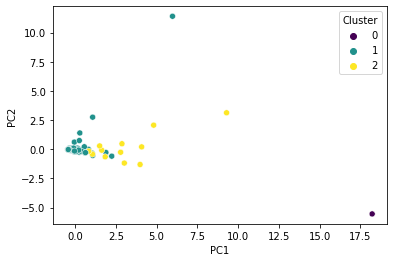

In [199]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = pca_df, hue = 'Cluster', palette = 'viridis')

Which are your conclusions?

### Cluster analysis

[**EX21**][**REPORT**] For each cluster, calculate the **mean**, **standard deviation**, **min**, **max** for each variable.
- Which is the cluster with the highest voice usage? 
- Which is the cluster with the highest data usage?
- Customers in the cluster with bigger companies (i.e. bigger number or employes and turnover) use to spend more than the others customers?
- As a part of the data scientist team, which is your recommended cluster of customers to sell a new mobile tariff with unlimited data traffic? And for a new mobile tariff with unlimited voice traffic? 

Some statistics for every cluster

In [190]:
training_dt_kmeans3.groupby('label3').agg(['mean', 'std','min', 'max'])

Data_usage                                         Voice_usage  \
              mean         std         min          max           mean   
label3                                                                   
0       739.684075         NaN  739.684075   739.684075  260638.688889   
1        24.264014  166.202171    0.000000  2568.383400    1176.231731   
2       341.363821  390.625869   68.770909  1373.676341   30053.481650   

                                                   Monthly_expense  \
                 std            min            max            mean   
label3                                                               
0                NaN  260638.688889  260638.688889     9091.513176   
1        2169.225464       0.000000   14368.450002      153.447525   
2       13156.904971   16422.461374   60426.374415     2079.034231   

                                              
               std          min          max  
label3                                        
0              NaN  9091.513176  9091.513176  
1        274.05771     0.002533  2560.361414  
2       1475.44364   448.621526  5302.102481

Show centroids for every cluster

In [191]:
kmeans3.cluster_centers_

array([[7.39684075e+02, 2.60638689e+05, 9.09151318e+03],
       [2.42640139e+01, 1.17623173e+03, 1.53447525e+02],
       [3.41363821e+02, 3.00534817e+04, 2.07903423e+03]])

/tmp/ipykernel_4422/2271863296.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure(figsize = (16, 12)).gca(projection='3d')


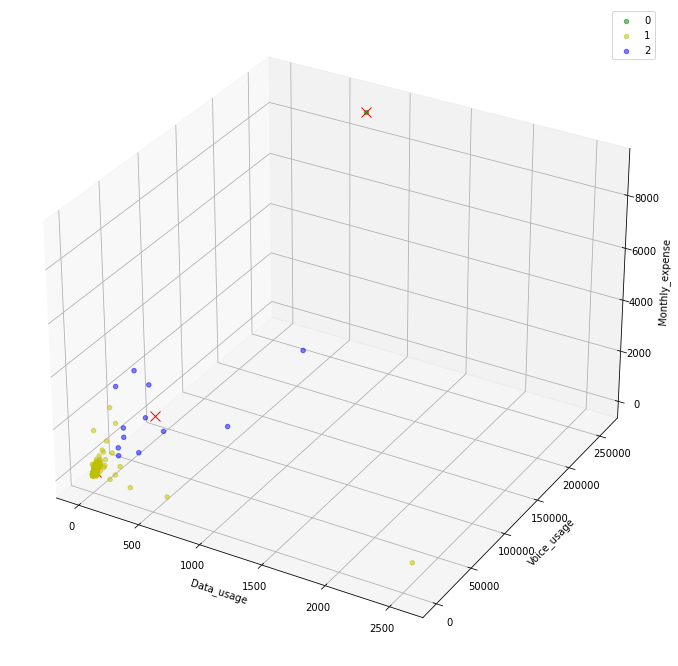

In [237]:
threedee = plt.figure(figsize = (16, 12)).gca(projection='3d')
threedee.scatter(training_dt_kmeans3['Data_usage'].where(training_dt_kmeans3.label3 == 0), training_dt_kmeans3['Voice_usage'].where(training_dt_kmeans3.label3 == 0), training_dt_kmeans3['Monthly_expense'].where(training_dt_kmeans3.label3 == 0), c = 'g', label = 0, alpha = 0.5)
threedee.scatter(training_dt_kmeans3['Data_usage'].where(training_dt_kmeans3.label3 == 1), training_dt_kmeans3['Voice_usage'].where(training_dt_kmeans3.label3 == 1), training_dt_kmeans3['Monthly_expense'].where(training_dt_kmeans3.label3 == 1), c = 'y', label = 1, alpha = 0.5)
threedee.scatter(training_dt_kmeans3['Data_usage'].where(training_dt_kmeans3.label3 == 2), training_dt_kmeans3['Voice_usage'].where(training_dt_kmeans3.label3 == 2), training_dt_kmeans3['Monthly_expense'].where(training_dt_kmeans3.label3 == 2), c = 'b', label = 2, alpha = 0.5)
threedee.set_xlabel('Data_usage')
threedee.set_ylabel('Voice_usage')
threedee.set_zlabel('Monthly_expense')
threedee.legend()
for c in kmeans3.cluster_centers_:
    threedee.plot(c[0], c[1], c[2], markerfacecolor = 'r', markeredgecolor = 'r', marker = 'x', markersize = 10)
plt.show()

# Let's repeat step 3 and 4 with Mixture of Gaussians clustering

As we know, there are other mechanisms to cluster a dataset. Let's test how Mixture of Gaussians function from sklearn library works.

[**EX22**][**CODE**][**REPORT**] Execute the Mixture of Gaussians function (with number of components=3) to `training_dt` dataset with `Voice_usage`, `Data_usage`and `Monthly_expense` variables. 
- Which is the size of each cluster? 
- Visualize the scatter plot between `Data_usage` vs `Voice_usage`. Is it similar to the resulting from K-Means and K=3?
- Visualize the scatter plot between `Data_usage` vs `Monthly_expense`. Is it similar to the resulting from K-Means and K=3?
- Visualize the scatter plot between `Voice_usage` vs `Monthly_expense`. Is it similar to the resulting from K-Means and K=3?

Tip: You may use [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) from Sklearn libray.

In [ ]:
#Your code goes here

[**EX23**][**REPORT**] Visualize the 3D plot  between `Voice_usage`, `Data_usage`and `Monthly_expense` after the clustering process. Apply a rotation of (0, -60)

Tip: use [scatter3d](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) to create 3D scatter plots.

In [ ]:
#Your code goes here

[**EX24**][**REPORT**] Evaluate the **Silhouette** metric for MoG with **number of components** from 2 to 7. Which is the number of cluster with the highest score?

In [ ]:
#Your code goes here

#To think about it

[**EX25**][**REPORT**] In this project we have used several clustering techniques to segment a customer base with aim to have a clear understanding about how they are. It is a very useful application in marketing to identify clusters or groups of target customers to sell a product or to focus a marketing campaign. 
However, clustering have a lot of applications. In this exercise we will apply to other use case:

We have clustered the population in an area of Barcelona according to several criterias:

**Clustering execution 1:** is based on `number_family_members`, `electricity_consumption`and `water_consumption`. The output is the following:

![picture](https://drive.google.com/uc?id=1bJz7BhjYkbnb8hVLtevnYPLaWOBpsFOQ)

**Clustering execution 2:** is based on `number_pets`, `size_home`and `number_kids`. The output is the following:
![picture](https://drive.google.com/uc?id=1SaJKIrjcMUfUKdl9D01R3I7L3KfXAfQV)

**Clustering execution 3:** is based on `education_level`, `salary`and `number_vehicles`. The output is the following:
![picture](https://drive.google.com/uc?id=1FAP9lPbFOBZjbRxUD44l2IW7n4G2FIKY)

The caracteristic (average+deviation) of each variable that describes each segment (or cluster) for each clustering process is the following:
![picture](https://drive.google.com/uc?id=1lEVX2KiD6Y27yWbjbFrn738QWojmIGVi)



Answer the following questions considering the previous maps and the description of each cluster (table above):
- Describe the homes located in the map:
![picture](https://drive.google.com/uc?id=1wge_JPN1SR2gfGwj89-tZAV8BTBDpNQY)
- Which clustering execution has produced more homogeneous groups? Justify your answer
- Which clustering execution should have better silhoette? Justify your anwer
- If we would like to build a **fast food** restaurant, where would you place it? Justify your answer
- If we would like to place a **school**, where would you place it? Justify your answer
- In case we would like to place a **laundry**, which 3 variables you would select from the following dataset to launch a new clustering process:
`number_family_members`, `monthly_dress_expense`, `number_shoes`, `electricity_consumption`,`number_cars`,`monthly_mobile_expense`, `number_rooms`, `water_consumption`, `number_pets`, `size_home`, `number_kids`, `education_level`, `salary` and `number_vehicles`.
